<a href="https://colab.research.google.com/github/ilhamrozie/pyreservoir_exercise/blob/main/Ass_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)

In [ ]:
# clone "pyreservoir" repository
!git clone https://github.com/yohanesnuwara/pyreservoir

fatal: destination path 'pyreservoir' already exists and is not an empty directory.


In [ ]:
# import system and define path
import sys
sys.path.append('/content/pyreservoir/matbal')

In [ ]:
# import "mbal" module and from that import the functions
from mbal import drygas, gascondensate, oil

In [ ]:
df = pd.read_csv('Data_5 - Data_5.csv')

df.head()

,Date,p (psia),Np (STB),Gp (SCF),Wp (STB),Gi (SCF),Wi (STB),Rp (SCF/STB),Bo (RB/STB),Bg (RB/SCF),Rs (SCF/STB),Rv (STB/SCF)
0,2007-09-01,4780.59,0,0,0.0,0,0,0.0,1.304902,0.000962,627.711085,0
1,2007-10-01,4780.59,0,0,0.0,0,0,0.0,1.304902,0.000962,627.711085,0
2,2007-11-01,4780.59,0,0,0.0,0,0,0.0,1.304902,0.000962,627.711085,0
3,2007-12-01,4780.59,0,0,0.0,0,0,0.0,1.304902,0.000962,627.711085,0
4,2008-01-01,4780.59,0,0,0.0,0,0,0.0,1.304902,0.000962,627.711085,0


In [ ]:
df = df.rename(columns={'Date': 't', 'p (psia)': 'p', 'Np (STB)': 'Np','Gp (SCF)': 'Gp','Wp (STB)': 'Wp', 'Gi (SCF)': 'Gi', 'Wi (STB)': 'Wi', 'Rp (SCF/STB)' : 'Rp', 'Bo (RB/STB)' : 'Bo', 'Bg (RB/SCF)' : 'Bg', 'Rs (SCF/STB)' : 'Rs', 'Rv (STB/SCF)' : 'Rv'})

df.head(10)

,t,p,Np,Gp,Wp,Gi,Wi,Rp,Bo,Bg,Rs,Rv
0,2007-09-01,4780.59,0,0,0.00,0,0,0.000,1.304902,0.000962,627.711085,0
1,2007-10-01,4780.59,0,0,0.00,0,0,0.000,1.304902,0.000962,627.711085,0
2,2007-11-01,4780.59,0,0,0.00,0,0,0.000,1.304902,0.000962,627.711085,0
3,2007-12-01,4780.59,0,0,0.00,0,0,0.000,1.304902,0.000962,627.711085,0
4,2008-01-01,4780.59,0,0,0.00,0,0,0.000,1.304902,0.000962,627.711085,0
5,2008-02-01,4725.76,308749,250870000,2595.03,0,0,812.537,1.305797,0.000970,627.711085,0
6,2008-03-01,4521.70,833031,683581000,2767.48,0,0,820.595,1.309193,0.001003,627.711085,0
7,2008-04-01,4297.32,1301790,1091990000,5799.25,0,187124,838.837,1.313071,0.001043,627.711085,0
8,2008-05-01,4353.89,2090960,1769630000,108190.00,0,1579180,846.324,1.312078,0.001032,627.711085,0
9,2008-06-01,4359.69,2995280,2533180000,111174.00,0,2911280,845.724,1.311977,0.001031,627.711085,0


In [ ]:
p = df['p'].to_numpy()
Np = df['Np'].to_numpy()
Gp = df['Gp'].to_numpy()
Wp = df['Wp'].to_numpy()

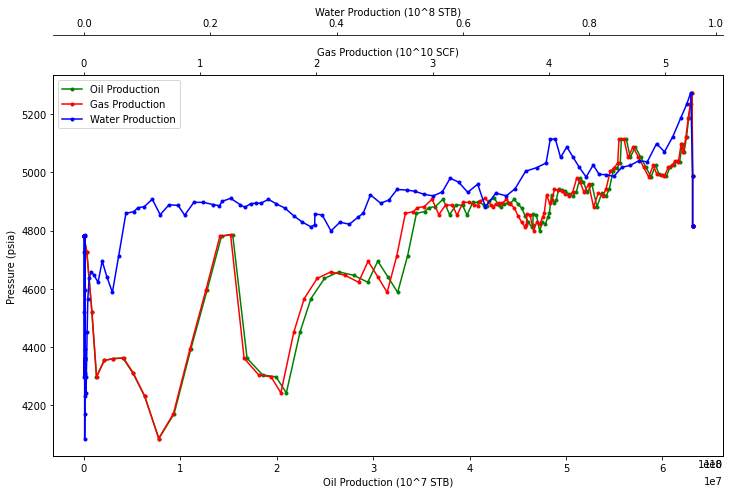

In [ ]:
fig = plt.figure(figsize=(12,7))


ax = fig.add_subplot(111,label="1")
ax2 = ax.twiny()
ax3 = ax.twiny()


lns1 = ax.plot(Np,p,'.-',color='green',label="Oil Production")
ax.set_xlabel('Oil Production (10^7 STB)')
ax.set_ylabel('Pressure (psia)')


lns2 = ax2.plot(Gp,p,'.-',color='red',label="Gas Production") 
ax2.set_xlabel('Gas Production (10^10 SCF)')


lns3 = ax3.plot(Wp,p,'.-',color='blue',label="Water Production")
ax3.spines['top'].set_position(('outward', 40))
ax3.set_xlabel('Water Production (10^8 STB)')

lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0)
plt.show()

In [ ]:
Bo = df['Bo'].to_numpy()
Bg = df['Bg'].to_numpy()
Rs = df['Rs'].to_numpy()

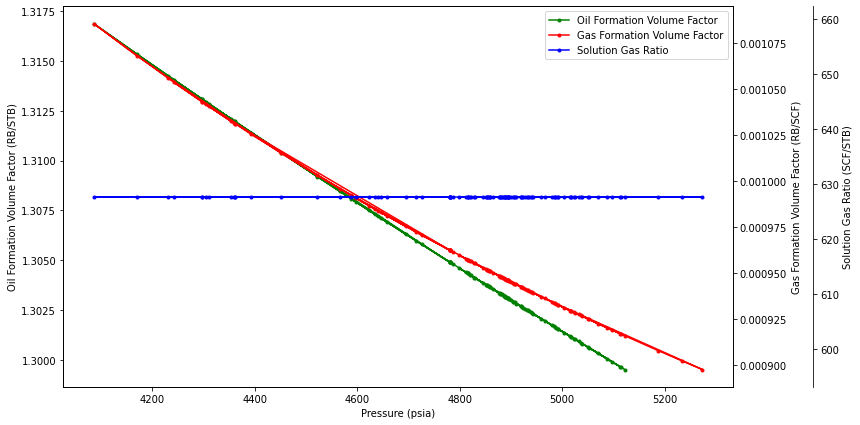

In [ ]:

fig = plt.figure(figsize=(12,7))

ax = fig.add_subplot(111,label="1")
ax2 = ax.twinx()
ax3 = ax.twinx()


lns1 = ax.plot(p,Bo,'.-',color='green',label="Oil Formation Volume Factor")
ax.set_xlabel('Pressure (psia)')
ax.set_ylabel('Oil Formation Volume Factor (RB/STB)')


lns2 = ax2.plot(p,Bg,'.-',color='red',label="Gas Formation Volume Factor") 
ax2.set_ylabel('Gas Formation Volume Factor (RB/SCF)')


lns3 = ax3.plot(p,Rs,'.-',color='blue',label="Solution Gas Ratio")
ax3.spines['right'].set_position(('outward', 80))
ax3.set_ylabel('Solution Gas Ratio (SCF/STB)')

lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0)
plt.show()